<a href="https://colab.research.google.com/github/tbarton16/base_cnn/blob/main/notebooks/cnn_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MNIST CNN Classification
In this notebook, we will use PyTorch to make a CNN and train it on MNIST.

In [1]:
import torch
import torchvision
import torch.nn.functional as F

# Hyperparameters


In [ ]:
bsz= 10
lr = 1e-4
n_epochs = 10
device =  torch.device('cuda')


## Download MNIST


### Creating the dataset involves 3 steps:


1.   Downloading the data from the torchvision repository
2.   Applying transforms that convert np images to torch tensors and normalize
3.   Splitting the data into a train and validation splits.



In [1]:
transform = torchvision.transforms.Compose([
  torchvision.transforms.ToTensor(),
  torchvision.transforms.Normalize((0.1307,), (0.3081,))
])

NameError: ignored

In [ ]:
train_dataset = torchvision.datasets.MNIST('../data', train=True, download=True, transform=transform)
validation_dataset = torchvision.datasets.MNIST('../data', train=False, transform=transform)

### Convert the dataset into a `dataloader`


In [ ]:
dataloader_train = torch.utils.data.DataLoader(train_dataset, shuffle=True, batch_size = bsz)
dataloader_val = torch.utils.data.DataLoader(validation_dataset, shuffle=True, batch_size = bsz)

## Define the CNN architecture

> [(W−K+2P)/S]+1



In [ ]:
class MNIStNN(torch.nn.Module):
  """Take image tensors and output logits"""
  def __init__(self, n_classes):
    """ Architexture: convolution layers (2) (4x4) 
                      fc layers (2) 
                      output layer needs to be n_classes
    """
    super().__init__()
    self.n_classes = n_classes
    self.conv1 = torch.nn.Conv2d(in_channels=1, out_channels=10, kernel_size=4) # input (bsz, 1, 28, 28) -> (bsz, 10, 25, 25)
    # [(W−K+2P)/S]+1 = (28 - 4 +  ) / 1  + 1 = 25
    # 25 - 4 + 0 /1 + 1 = 22
    self.conv2 = torch.nn.Conv2d(in_channels=10, out_channels=10, kernel_size=4) # output =(bsz, 10, 22, 22)
    self.lin1 = torch.nn.Linear(10* 22 * 22, 256)
    self.lin2 = torch.nn.Linear(256, self.n_classes)

  def forward(self, x):
    first_layer = F.relu(self.conv1(x))
    second_layer = F.relu(self.conv2(first_layer))# (bsz, 10, 22, 22)
    second_layer_flat = second_layer.reshape((second_layer.shape[0], -1))
    fc_1 = F.relu(self.lin1(second_layer_flat))
    logits = self.lin2(fc_1)

    return logits

x = torch.randn(10,1,28,28)
tessnet = MNIStNN(10)
print(tessnet(x).shape)

torch.Size([10, 10])


In [ ]:
class LeNet(torch.nn.Module):
  """ Input tensors and calculate logits""" 
  def __init__(self, n_classes):
    super().__init__()
    self.n_classes = n_classes
    self.conv1 = torch.nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5) # input (bsz, 1, 28,28) (bsz, 6, 24, 24)
    # [(W−K+2P)/S]+1 (28 - 5)/1 + 1
    self.batchnorm = torch.nn.BatchNorm2d(num_features=6 )
    self.maxpool = torch.nn.MaxPool2d(kernel_size=2) # (bsz, 6, 12, 12)
    self.conv2 =  torch.nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5)  # (bsz, 16, 8, 8)
    self.batchnorm2 = torch.nn.BatchNorm2d(num_features=16)
    self.maxpool2 = torch.nn.MaxPool2d(kernel_size=2) # (bsz, 16, 4, 4)
    self.fc0 = torch.nn.Linear(16*4*4, 120)
    self.fc1 = torch.nn.Linear(120, 84)
    self.fc2 = torch.nn.Linear(84, self.n_classes)

  def forward(self,x):
    c1 = self.conv1(x)
    bn = self.batchnorm(c1)
    mp = self.maxpool(F.relu(bn))
    c2 = self.conv2(mp)
    bn2 = self.batchnorm2(c2)
    mp2 = self.maxpool2(F.relu(bn2))
    features_flat = mp2.reshape(mp2.shape[0], -1)
    f1 = F.relu(self.fc0(features_flat))
    f2 = F.relu(self.fc1(f1))
    logits = F.relu(self.fc2(f2))

    return logits

x = torch.randn(10,1,28,28)
tessnet = LeNet(10)
print(tessnet(x).shape)

torch.Size([10, 10])


In [ ]:
for X, y in dataloader_train:
  break

## Training Loop
Produce a training loss curve that goes down over time.

In [ ]:
criterion = torch.nn.CrossEntropyLoss()
tessnet = LeNet(10).to(device)
optimizer = torch.optim.Adam(tessnet.parameters(), lr=lr)

tessnet.train() # some layers behave differently in train or test mode (dropout, batch norm)
losses = []
for e in range(n_epochs):
  for i, batch in enumerate(dataloader_train):
    # move minibatch (only) to device
    X,y = batch
    X, y  = X.to(device), y.to(device)
    logits = tessnet(X)
    loss = criterion(logits, y)
    optimizer.zero_grad() # clears gradients from each node
    loss.backward() # performs backprop to find the gradient at each node
    optimizer.step() # updates the parameters
    if i % 99==0:
      print(loss.item())
    losses.append(loss.item())

2.2830557823181152
2.2818779945373535
1.8800716400146484
1.9220125675201416
1.0602778196334839
1.4282146692276
0.9862087965011597
1.140547752380371
0.3676227033138275
0.7402256727218628
0.8225216865539551
0.48971033096313477
0.6303771734237671
0.8425195813179016
1.0257947444915771
0.7063733339309692
0.036657899618148804
0.4923439621925354
1.207017183303833
0.39375725388526917
0.2620166838169098
0.24785736203193665
0.05594904348254204
0.8471209406852722
0.3354804217815399
0.7061797380447388
0.6105878353118896
0.7868552803993225
0.31067997217178345
0.7378519773483276
0.9343346357345581
0.6683343052864075
0.3322896957397461
0.7058837413787842
0.7208536863327026
0.8561877012252808
0.17750653624534607
0.5351110696792603
0.46925482153892517
0.47974032163619995
0.7441506385803223
0.4224326014518738
0.7289177179336548
0.4936775267124176
0.013891272246837616
0.46610814332962036
0.7931881546974182
0.7409679293632507
0.23984161019325256
0.937588095664978
0.5181482434272766
0.37508025765419006
0.9

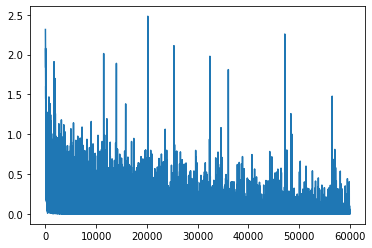

In [ ]:
import matplotlib.pyplot as plt
plt.plot(losses)

In [ ]:
import matplotlib.pyplot as plt
plt.plot(losses)

## Validation Loop
Compute Validation Error on the final model

## Visualize Some Predictions